In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../../DATA/mushrooms.csv")

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
X = df.drop('class',axis=1)
y = df['class']
X = pd.get_dummies(X,drop_first=True,dtype=int)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.05,0.2]}

In [35]:
gb_model = GradientBoostingClassifier()

In [36]:
grid = GridSearchCV(gb_model,param_grid)

In [37]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [38]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [39]:
predictions = grid.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



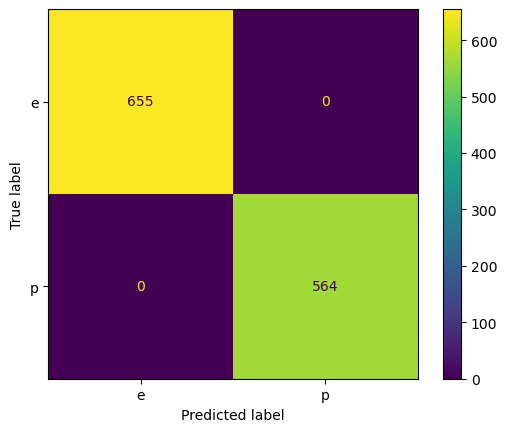

In [50]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions),display_labels=grid.best_estimator_.classes_).plot()

In [51]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.99826674e-16, 2.78543637e-18, 0.00000000e+00,
       7.32198142e-17, 1.04652037e-03, 1.05343653e-17, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 8.86260694e-18, 0.00000000e+00,
       3.32887539e-17, 0.00000000e+00, 0.00000000e+00, 2.22085608e-08,
       2.31225678e-03, 5.47347789e-02, 6.24175887e-04, 1.74937406e-02,
       1.82499853e-02, 3.56891616e-04, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29231264e-02,
       1.07415714e-02, 0.00000000e+00, 1.26210161e-16, 1.03424316e-18,
       5.32857105e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.21035652e-17, 0.00000000e+00, 4.50415892e-17, 0.00000000e+00,
       4.95499827e-04, 0.00000000e+00, 1.35972688e-01, 4.69032068e-03,
       3.94732104e-02, 3.58176838e-03, 1.69084635e-03, 4.95063766e-06,
       0.00000000e+00, 5.62862863e-04, 2.66232424e-02, 4.56525529e-05,
       0.00000000e+00, 0.00000000e+00, 7.98356891e-04, 0.00000000e+00,
      

In [52]:
feat_import = grid.best_estimator_.feature_importances_

In [53]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [54]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.998267e-16
cap-shape_k,2.785436e-18
cap-shape_s,0.000000e+00
cap-shape_x,7.321981e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.969728e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [55]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135973
bruises_t,0.054735
stalk-root_r,0.039473
spore-print-color_r,0.030495
...,...
gill-color_e,0.000000
veil-color_o,0.000000
gill-attachment_f,0.000000
gill-color_y,0.000000


In [56]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064668,0.0,0.0,2.220856e-08,0.000711,0.614744


In [57]:
imp_feats.sort_values('Importance')

,Importance
habitat_w,0.000000
stalk-color-above-ring_g,0.000000
gill-attachment_f,0.000000
ring-number_t,0.000000
veil-color_o,0.000000
...,...
spore-print-color_r,0.030495
stalk-root_r,0.039473
bruises_t,0.054735
stalk-root_c,0.135973


In [59]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [60]:
imp_feats.sort_values('Importance')

,Importance
stalk-surface-below-ring_s,0.000563
odor_c,0.000624
stalk-color-above-ring_n,0.000798
cap-surface_g,0.001047
stalk-color-below-ring_c,0.001218
ring-type_p,0.001269
population_c,0.001348
stalk-surface-above-ring_s,0.001691
ring-type_n,0.002190
cap-color_y,0.002312


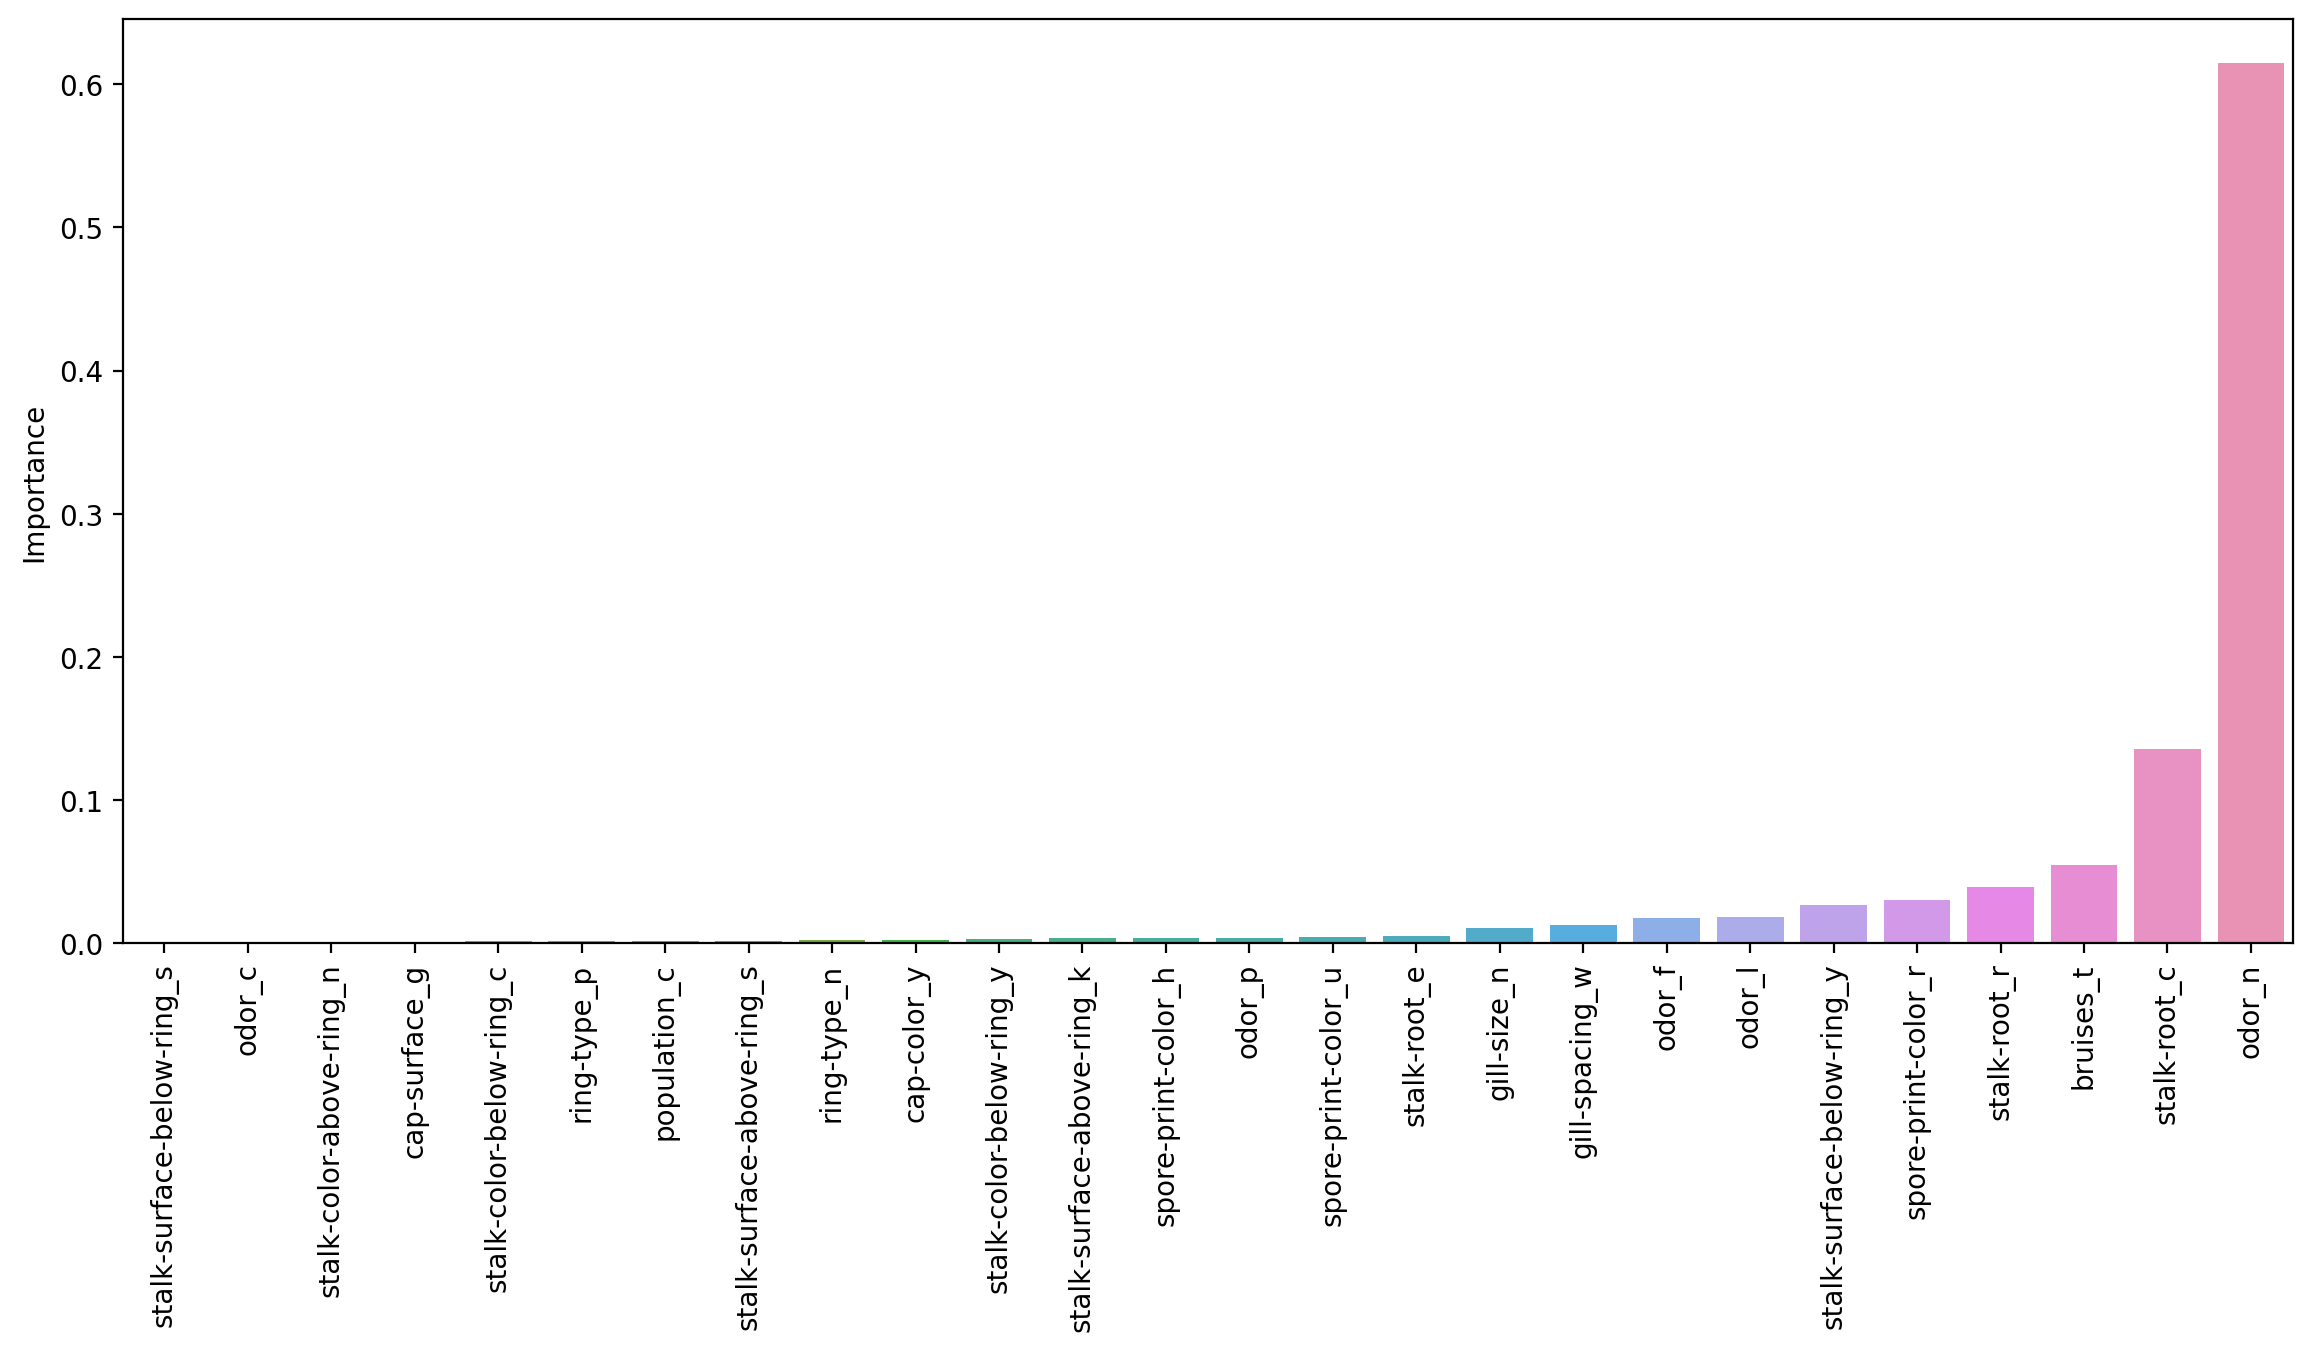

In [61]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);